In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
sow = pd.read_csv('data-files/summary-of-weather.csv')
sow.columns
sow_10001 = sow[sow['STA'] == 10001]
only_temp_sow = sow_10001[["Date", "MeanTemp"]].copy()
only_temp_sow.to_csv("data-files/only-means-temp.csv", index=False)

C:\Users\human\AppData\Local\Temp\ipykernel_10128\3815969021.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  sow = pd.read_csv('data-files/summary-of-weather.csv')


In [9]:
df0 = pd.read_csv('data-files/only-means-temp.csv')
print( df0.shape )
display(df0.head())
display(df0.tail())

(1157, 2)


,Date,MeanTemp
0,1942-7-1,23.888889
1,1942-7-2,25.555556
2,1942-7-3,24.444444
3,1942-7-4,24.444444
4,1942-7-5,24.444444


,Date,MeanTemp
1152,1945-8-27,25.555556
1153,1945-8-28,24.444444
1154,1945-8-29,24.444444
1155,1945-8-30,25.555556
1156,1945-8-31,25.555556


In [11]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1157 non-null   object 
 1   MeanTemp  1157 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.2+ KB


In [12]:
ts0 = df0.copy()
ts0['Date'] = pd.to_datetime(ts0['Date'], format="%Y-%m-%d")
ts0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1157 non-null   datetime64[ns]
 1   MeanTemp  1157 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.2 KB


In [14]:
ts1 = ts0.copy()
ts1['Year'] = ts1.Date.dt.year
ts1['Month'] = ts1.Date.dt.month
ts1['Day'] = ts1.Date.dt.day
ts1['DayName'] = ts1.Date.dt.day_name()

ts1

,Date,MeanTemp,Year,Month,Day,DayName
0,1942-07-01,23.888889,1942,7,1,Wednesday
1,1942-07-02,25.555556,1942,7,2,Thursday
2,1942-07-03,24.444444,1942,7,3,Friday
3,1942-07-04,24.444444,1942,7,4,Saturday
4,1942-07-05,24.444444,1942,7,5,Sunday
...,...,...,...,...,...,...
1152,1945-08-27,25.555556,1945,8,27,Monday
1153,1945-08-28,24.444444,1945,8,28,Tuesday
1154,1945-08-29,24.444444,1945,8,29,Wednesday
1155,1945-08-30,25.555556,1945,8,30,Thursday


In [16]:
ts = ts1.loc[:, ["Date", "MeanTemp"]]
ts.set_index("Date", inplace=True)
ts.head()

,MeanTemp
Date,
1942-07-01,23.888889
1942-07-02,25.555556
1942-07-03,24.444444
1942-07-04,24.444444
1942-07-05,24.444444


In [21]:
def plot_ts(data, color, alpha, label):
    
    plt.figure(figsize=(11,5))
    plt.plot(data, color=color, alpha=alpha, label=label)
    plt.title("Mean Temperature of Weather")
    plt.ylabel('Mean temperature')
    plt.legend()
    plt.show()

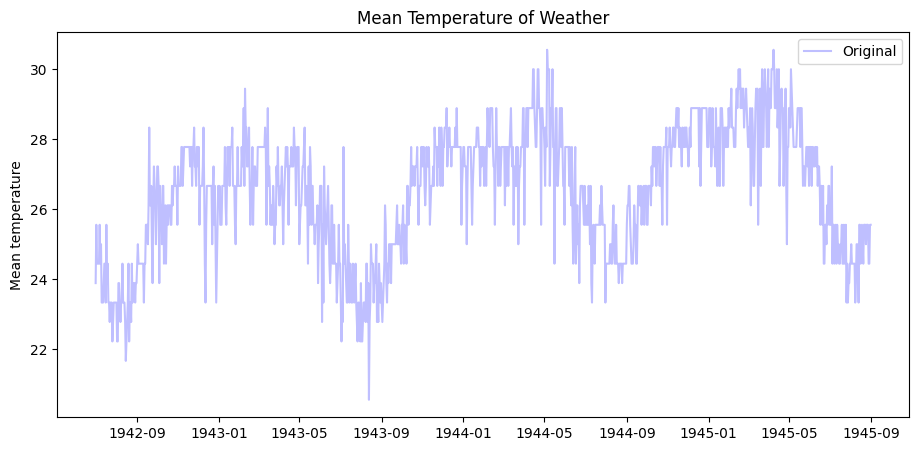

In [22]:
plot_ts(ts, 'blue', 0.25, 'Original')

In [26]:
from statsmodels.tsa.stattools import adfuller

adfuller(ts, autolag='AIC')

(-2.411973896374034,
 0.13838534571230687,
 12,
 1144,
 {'1%': -3.436079050499444,
  '5%': -2.8640697479399972,
  '10%': -2.5681169015905425},
 2851.0688744560252)

In [27]:
def ADF_test(data):
	# ADF 실시
    results = adfuller(data, autolag='AIC')
    
    # 통계량
    s = results[0]
    # p-value
    p = results[1]
    # 기각역
    cv = results[4]
    
    # 출력
    print('-'*30)
    print('Augemented Dickey-Fuller Test')
    print('H0 : 단위근이 존재한다 (비정상 시계열)')
    print('Ha : 단위근이 없다 (정상 시계열)')
    print('Critical Values : {}'.format(cv))
    print('-'*30)
    print('Test Statistics : {:.4f}'.format(s))
    print('p-value : {:.4f}'.format(p))
    print('-'*30)


In [28]:
ADF_test(ts)

------------------------------
Augemented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': -3.436079050499444, '5%': -2.8640697479399972, '10%': -2.5681169015905425}
------------------------------
Test Statistics : -2.4120
p-value : 0.1384
------------------------------


In [29]:
def plot_rolling(data, roll_size):
    # 이동평균함수(rolling) - 평균, 표준편차
    roll_mean = data.rolling(window=roll_size).mean()
    roll_std = data.rolling(window=roll_size).std()
    
    # 시각화
    plt.figure(figsize=(11,5))
    plt.plot(data, color='blue', alpha=0.25, label='Original')
    plt.plot(roll_mean, color='black', label='Rolling mean')
    plt.plot(roll_std, color='red', label='Rolling std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.ylabel("Mean Temperature")
    plt.legend()
    plt.show()

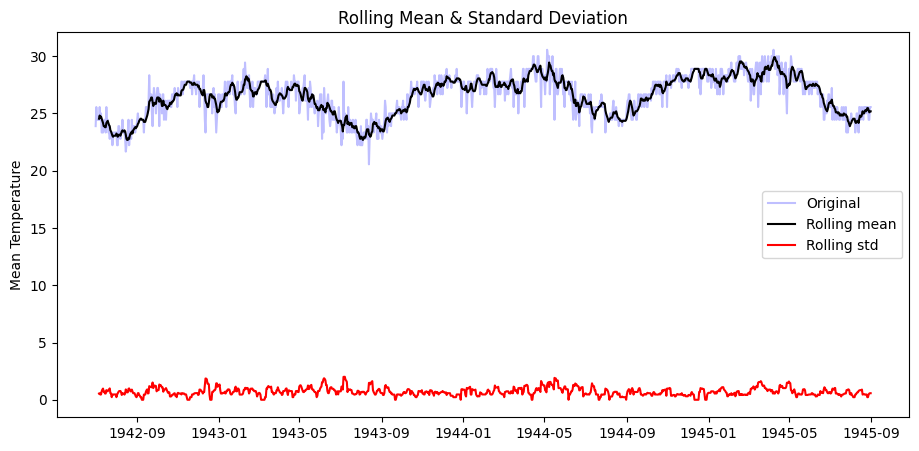

In [33]:
plot_rolling(ts, 6)

In [39]:
ts.rolling(window=6).mean().head(10)

,MeanTemp
Date,
1942-07-01,NaN
1942-07-02,NaN
1942-07-03,NaN
1942-07-04,NaN
1942-07-05,NaN
1942-07-06,24.537037
1942-07-07,24.814815
1942-07-08,24.629630
1942-07-09,24.722222


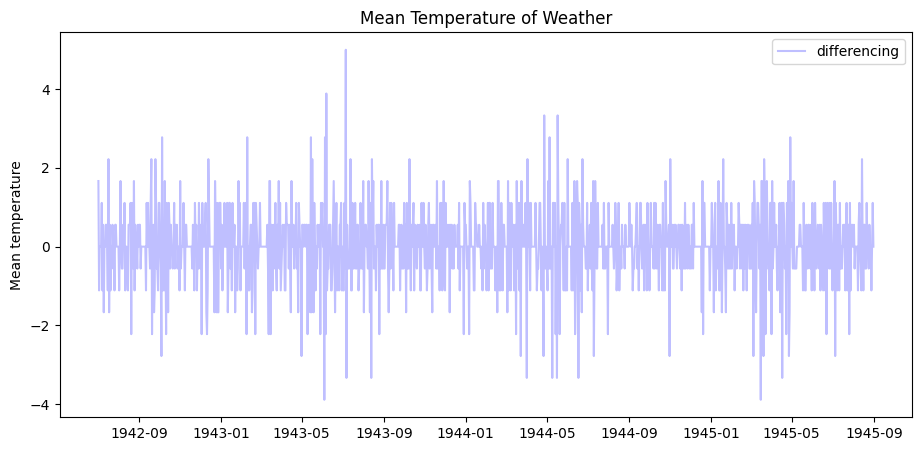

In [45]:
ts_diff = ts - ts.shift()

plot_ts(ts_diff, color='blue', alpha=0.25, label='differencing')
plt.show()

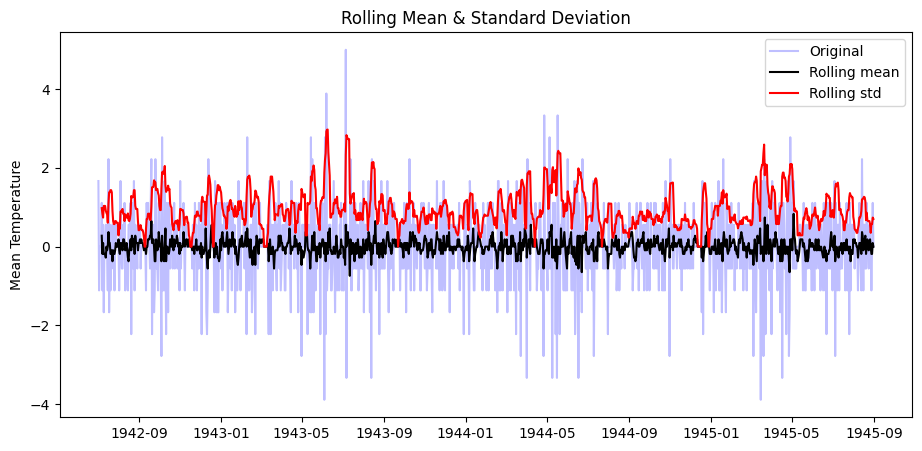

------------------------------
Augemented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': -3.436079050499444, '5%': -2.8640697479399972, '10%': -2.5681169015905425}
------------------------------
Test Statistics : -14.1837
p-value : 0.0000
------------------------------


In [50]:
plot_rolling(ts_diff, 6)
ADF_test(ts_diff.dropna())

In [51]:
ts_diff2 = ts.diff().dropna()

ADF_test(ts_diff2)

------------------------------
Augemented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': -3.436079050499444, '5%': -2.8640697479399972, '10%': -2.5681169015905425}
------------------------------
Test Statistics : -14.1837
p-value : 0.0000
------------------------------


Text(0.5, 1.0, 'Partial AutoCorrelation Function')

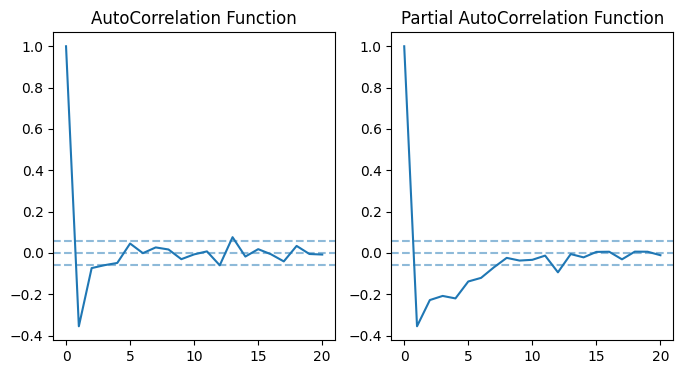

In [52]:
from statsmodels.tsa.stattools import acf, pacf

acf_20 = acf(x=ts_diff2, nlags=20)
pacf_20 = pacf(x=ts_diff2, nlags=20, method='ols')

confidence = 1.96/np.sqrt(len(ts_diff2))

# 시각화
plt.figure(figsize=(8,4))
# ACF
plt.subplot(1,2,1)
plt.plot(acf_20)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('AutoCorrelation Function')
# PACF
plt.subplot(1,2,2)
plt.plot(pacf_20)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('Partial AutoCorrelation Function')

Text(0.5, 1.0, 'Partial AutoCorrelation Function')

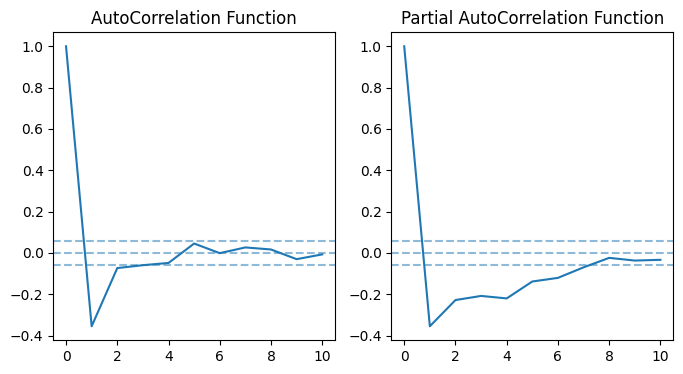

In [53]:
acf_10 = acf(x=ts_diff2, nlags=10)
pacf_10 = pacf(x=ts_diff2, nlags=10, method='ols')

confidence = 1.96/np.sqrt(len(ts_diff2))

# 시각화
plt.figure(figsize=(8,4))
# ACF
plt.subplot(1,2,1)
plt.plot(acf_10)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('AutoCorrelation Function')
# PACF
plt.subplot(1,2,2)
plt.plot(pacf_10)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('Partial AutoCorrelation Function')

In [54]:
# ARIMA
from statsmodels.tsa.arima.model import ARIMA

# index를 period로 변환해주어야 warning이 뜨지 않음
ts_copy = ts.copy()
ts_copy.index = pd.DatetimeIndex(ts_copy.index).to_period('D')

# 예측을 시작할 위치(이후 차분을 적용하기 때문에 맞추어주었음
start_idx = ts_copy.index[1]

# ARIMA(1,0,1)
model1 = ARIMA(ts_copy, order=(1,0,1))
# fit model
model1_fit = model1.fit()

# 전체에 대한 예측 실시
forecast1 = model1_fit.predict(start=start_idx)

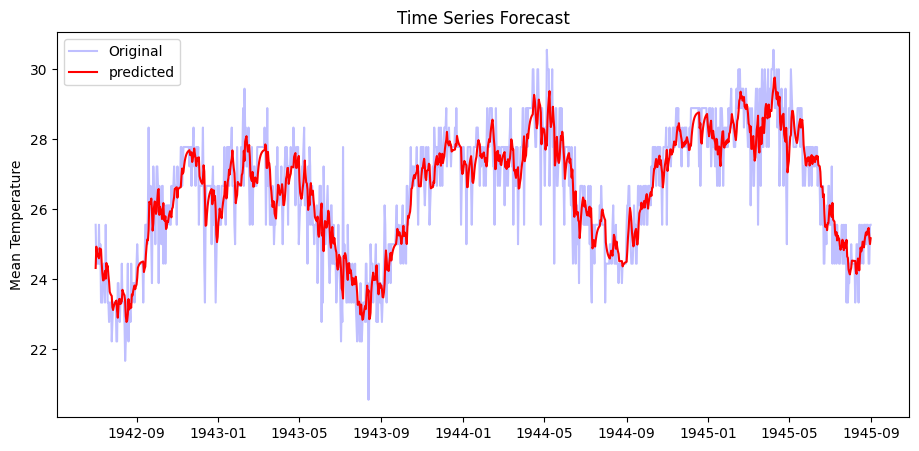

Mean Squared Error : 0.7435


In [55]:
from sklearn.metrics import mean_squared_error

def plot_and_error(data, forecast):
    # MSE 계산
    mse = mean_squared_error(data, forecast)
    # 시각화
    plt.figure(figsize=(11,5))
    plt.plot(data, color='blue', alpha=0.25 , label='Original')
    plt.plot(forecast, color='red', label='predicted')
    plt.title("Time Series Forecast")
    plt.ylabel("Mean Temperature")
    plt.legend()
    plt.show()
    # MSE 출력
    print('Mean Squared Error : {:.4f}'.format(mse))

plot_and_error(ts[1:], forecast1)

c:\Users\human\.conda\envs\human-da-env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


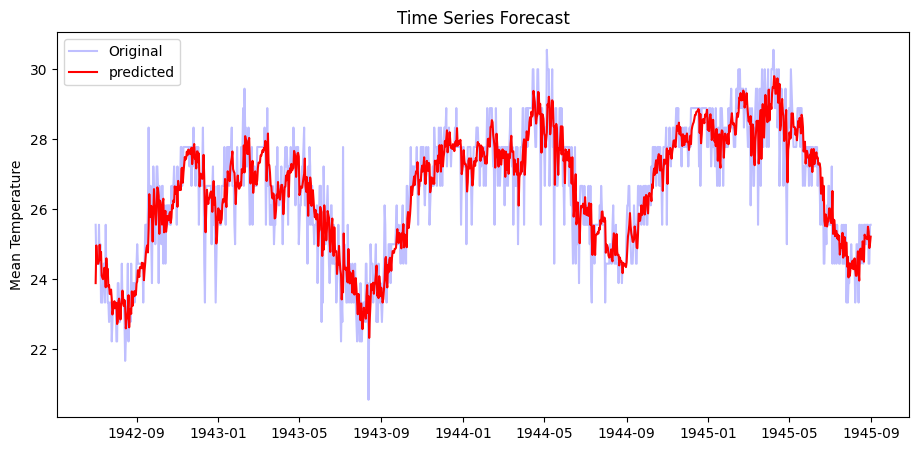

Mean Squared Error : 0.7115


In [57]:
# 모델 파라미터 최적화 (p=7, d=1, q=3)
model2 = ARIMA(ts_copy, order=(6,1,3))
# fit
model2_fit = model2.fit()
# 예측
forecast2 = model2_fit.predict(start=start_idx)
# 시각화 및 MSE 연산
plot_and_error(ts[1:], forecast2)

c:\Users\human\.conda\envs\human-da-env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\human\.conda\envs\human-da-env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\human\.conda\envs\human-da-env\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


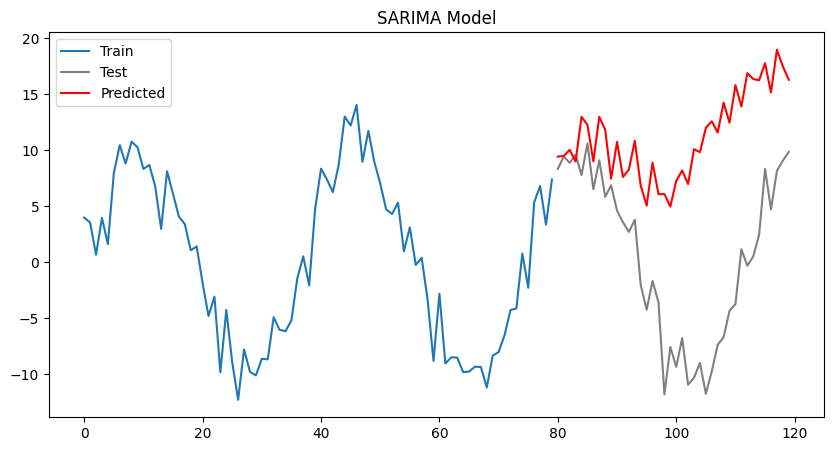

162.366604538525

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# 가상 데이터 생성
data = np.sin(np.linspace(0, 20, 120)) * 10 + np.random.normal(size=120) * 2

# 데이터를 pandas Series로 변환
ts = pd.Series(data)

# 학습 데이터와 테스트 데이터로 분리
train, test = ts[:80], ts[80:]

# SARIMA 모델 피팅
model = SARIMAX(train, order=(5, 2, 5), seasonal_order=(8, 1, 8, 6))
model_fitted = model.fit()

# 예측
predictions = model_fitted.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# 테스트 데이터와 예측 결과를 시각화
plt.figure(figsize=(10, 5))
plt.plot(train, label='Train')
plt.plot(test.index, test, label='Test', color='gray')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('SARIMA Model')
plt.legend()
plt.show()

# 모델의 성능 평가
mse = mean_squared_error(test, predictions)
mse